In [65]:
import pandas as pd
import GEOparse
from scipy.stats import ttest_ind
from utils.datasetReader import GraphReader
from utils.utils import *
import random
from utils.network_communities import NetworkCommunities
# from machine_learning.label_prediction import LabelPrediction
import networkx as nx

In [66]:
df = pd.read_csv('GSE16515.top.table.tsv', sep='\t')

In [67]:
df_step_0 = df

In [68]:
df_step_temp = df_step_0
df_step_temp.drop('adj.P.Val', axis=1)
df_step_temp.drop('t', axis=1)
df_step_temp.drop('B', axis=1)
df_step_temp

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,209270_at,2.960000e-10,1.520000e-14,-10.567783,22.630914,-3.673899,LAMB3,laminin subunit beta 3
1,201286_at,2.960000e-10,1.620000e-14,-10.548328,22.568849,-2.628715,SDC1,syndecan 1
2,201250_s_at,2.960000e-10,1.630000e-14,-10.547476,22.566130,-3.053357,SLC2A1,solute carrier family 2 member 1
3,218960_at,1.140000e-09,8.370000e-14,-10.067672,21.019149,-4.504130,TMPRSS4,"transmembrane protease, serine 4"
4,203510_at,3.930000e-09,3.600000e-13,-9.646757,19.637112,-2.589895,MET,"MET proto-oncogene, receptor tyrosine kinase"
...,...,...,...,...,...,...,...,...
54608,219579_at,1.000000e+00,1.000000e+00,-0.000420,-6.495591,-0.000050,RAB3IL1,RAB3A interacting protein like 1
54609,228630_at,1.000000e+00,1.000000e+00,-0.000386,-6.495591,-0.000055,ZNF84,zinc finger protein 84
54610,229728_at,1.000000e+00,1.000000e+00,-0.000226,-6.495591,-0.000036,NaN,NaN
54611,1554539_a_at,1.000000e+00,1.000000e+00,0.000166,-6.495591,0.000036,RHOF,"ras homolog family member F, filopodia associated"


In [69]:
import numpy as np
df_step_0['FC'] = np.exp(df_step_0['logFC'])

In [70]:
df_step_0

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title,FC
0,209270_at,2.960000e-10,1.520000e-14,-10.567783,22.630914,-3.673899,LAMB3,laminin subunit beta 3,0.025377
1,201286_at,2.960000e-10,1.620000e-14,-10.548328,22.568849,-2.628715,SDC1,syndecan 1,0.072171
2,201250_s_at,2.960000e-10,1.630000e-14,-10.547476,22.566130,-3.053357,SLC2A1,solute carrier family 2 member 1,0.047200
3,218960_at,1.140000e-09,8.370000e-14,-10.067672,21.019149,-4.504130,TMPRSS4,"transmembrane protease, serine 4",0.011063
4,203510_at,3.930000e-09,3.600000e-13,-9.646757,19.637112,-2.589895,MET,"MET proto-oncogene, receptor tyrosine kinase",0.075028
...,...,...,...,...,...,...,...,...,...
54608,219579_at,1.000000e+00,1.000000e+00,-0.000420,-6.495591,-0.000050,RAB3IL1,RAB3A interacting protein like 1,0.999950
54609,228630_at,1.000000e+00,1.000000e+00,-0.000386,-6.495591,-0.000055,ZNF84,zinc finger protein 84,0.999946
54610,229728_at,1.000000e+00,1.000000e+00,-0.000226,-6.495591,-0.000036,NaN,NaN,0.999964
54611,1554539_a_at,1.000000e+00,1.000000e+00,0.000166,-6.495591,0.000036,RHOF,"ras homolog family member F, filopodia associated",1.000036


In [71]:
df_step_1 = df_step_0[(df_step_0['logFC'] > 1.5) | (df_step_0['logFC'] < -1.5)]

In [72]:
df_step_1

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title,FC
0,209270_at,2.960000e-10,1.520000e-14,-10.567783,22.630914,-3.673899,LAMB3,laminin subunit beta 3,0.025377
1,201286_at,2.960000e-10,1.620000e-14,-10.548328,22.568849,-2.628715,SDC1,syndecan 1,0.072171
2,201250_s_at,2.960000e-10,1.630000e-14,-10.547476,22.566130,-3.053357,SLC2A1,solute carrier family 2 member 1,0.047200
3,218960_at,1.140000e-09,8.370000e-14,-10.067672,21.019149,-4.504130,TMPRSS4,"transmembrane protease, serine 4",0.011063
4,203510_at,3.930000e-09,3.600000e-13,-9.646757,19.637112,-2.589895,MET,"MET proto-oncogene, receptor tyrosine kinase",0.075028
...,...,...,...,...,...,...,...,...,...
29228,205869_at,8.570000e-02,4.590000e-02,2.045790,-4.491894,2.603436,PRSS2///PRSS1,"protease, serine 2///protease, serine 1",13.510086
29738,206598_at,9.240000e-02,5.030000e-02,2.003776,-4.570322,2.474331,INS,insulin,11.873755
29909,205912_at,9.510000e-02,5.210000e-02,1.988334,-4.598798,2.944968,PNLIP,pancreatic lipase,19.010050
33188,201909_at,1.500000e-01,9.090000e-02,1.722651,-5.058668,1.942445,RPS4Y1,"ribosomal protein S4, Y-linked 1",6.975787


In [73]:
df_step_1 = df_step_1[df_step_1['adj.P.Val'] > 0.01]

In [74]:
df_step_1 = df_step_1.dropna()
df_step_1

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title,FC
16704,207077_at,0.0103,0.00314,3.098501,-2.115244,3.589013,CELA2B,chymotrypsin like elastase family member 2B,36.198323
16766,1556057_s_at,0.0104,0.00320,3.091356,-2.133771,1.748284,NEUROD1,neuronal differentiation 1,5.744736
16962,227676_at,0.0108,0.00335,-3.075747,-2.174144,-1.596968,FAM3D,family with sequence similarity 3 member D,0.202510
17229,238103_at,0.0113,0.00358,-3.052234,-2.234697,-1.917596,LINC01207,long intergenic non-protein coding RNA 1207,0.146960
17797,204965_at,0.0125,0.00409,3.004769,-2.355955,2.096268,GC,"GC, vitamin D binding protein",8.135751
18279,207434_s_at,0.0136,0.00456,2.965276,-2.455837,1.745553,FXYD6-FXYD2///FXYD2,FXYD6-FXYD2 readthrough///FXYD domain containi...,5.729069
18466,205844_at,0.0141,0.00477,-2.948967,-2.496814,-1.638420,VNN1,vanin 1,0.194287
18512,226067_at,0.0143,0.00484,-2.943899,-2.509515,-1.857746,BPIFB1,BPI fold containing family B member 1,0.156024
18880,212281_s_at,0.0152,0.00527,2.912940,-2.586764,1.534817,TMEM97,transmembrane protein 97,4.640479
19063,205674_x_at,0.0158,0.00551,2.896742,-2.626950,1.819470,FXYD2,FXYD domain containing ion transport regulator 2,6.168587


In [75]:
df_step_1['Gene.symbol'].to_csv('gen_names.csv', index=False)

In [78]:
df_temp_0 = pd.read_csv('datasets/string_interactions.tsv', sep='\t')

In [83]:
df_temp_0

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,CEL,CPA1,9606.ENSP00000501111,9606.ENSP00000011292,0,0.0,0.0,0.0,0.913,0.000,0.0,0.518,0.956
1,CEL,CLPS,9606.ENSP00000501111,9606.ENSP00000259938,0,0.0,0.0,0.0,0.695,0.000,0.0,0.739,0.917
2,CEL,SST,9606.ENSP00000501111,9606.ENSP00000287641,0,0.0,0.0,0.0,0.000,0.000,0.0,0.547,0.547
3,CEL,CELA3A,9606.ENSP00000501111,9606.ENSP00000290122,0,0.0,0.0,0.0,0.833,0.052,0.0,0.296,0.879
4,CEL,CTRB2,9606.ENSP00000501111,9606.ENSP00000303963,0,0.0,0.0,0.0,0.833,0.052,0.0,0.422,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,TTR,SST,9606.ENSP00000237014,9606.ENSP00000287641,0,0.0,0.0,0.0,0.159,0.000,0.0,0.323,0.406
286,TTR,GCG,9606.ENSP00000237014,9606.ENSP00000387662,0,0.0,0.0,0.0,0.122,0.000,0.0,0.394,0.445
287,TTR,INS,9606.ENSP00000237014,9606.ENSP00000380432,0,0.0,0.0,0.0,0.154,0.096,0.4,0.625,0.805
288,TTR,GC,9606.ENSP00000237014,9606.ENSP00000421725,0,0.0,0.0,0.0,0.728,0.000,0.0,0.645,0.899


In [84]:
unique_node_ids = pd.concat([df_temp_0['node1_string_id'], df_temp_0['node2_string_id']]).unique()

# Create node.csv DataFrame
node_df = pd.DataFrame({
    'node_id': unique_node_ids,
    'labels': [''] * len(unique_node_ids)
})

# Create edge.csv DataFrame
edge_df = pd.DataFrame({
    'id_1': [i for _ in range(len(df_temp_0)) for i in [df_temp_0['node1_string_id'].iloc[_]] * len(df_temp_0)],
    'id_2': df_temp_0['node2_string_id'].repeat(len(df_temp_0))
})

In [87]:
node_df.to_csv('datasets/nodes.csv', index=False)
edge_df.to_csv('datasets/edges.csv', index=False)

TIME FINISHED :  0.03454327583312988
                    MY DataSets
**************************************************************************************************************
*                    Number of nodes : 31                                                                    *
*                    Number of edges : 290                                                                   *
*                    Density : 0.3118279569892473                                                            *
*                    Clustering coefficient 1 0.6349693251533742                                             *
*                    Clustering coefficient 2 0.6221510568284762                                             *
*                    Diameter : 3                                                                            *
*                    Assortativity : 0.22560720754191244                                                     *
*                    Top 5 betweenness cent

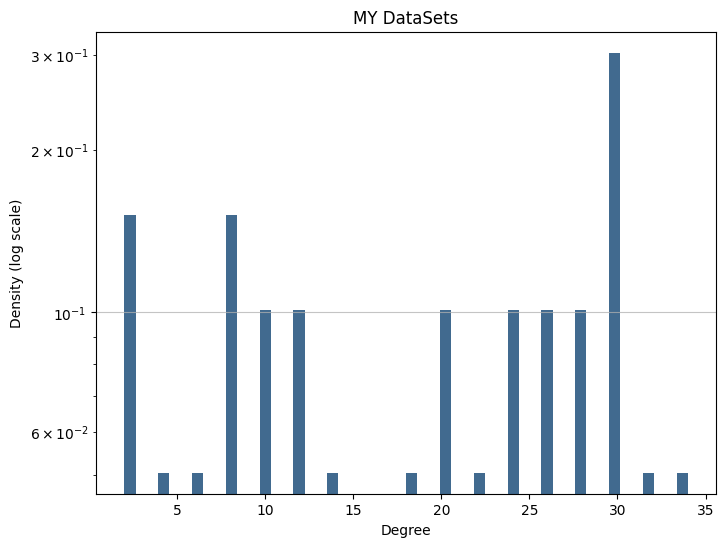

In [88]:
graphReader = []
graph_population = GraphReader(dataset="datasets")
graphReader.append({"GR": graph_population, "title": "MY DataSets"})

# visualize metrics
for item in graphReader:
    visualize(
        params=calculateMetrics(item["GR"].get_graph()),
        G=item["GR"].get_graph(),
        title=item["title"],
    )

In [92]:
top_nodes_betweenness = ['9606.ENSP00000368244', '9606.ENSP00000222543', '9606.ENSP00000421725', '9606.ENSP00000415011', '9606.ENSP00000250784']
top_nodes_closeness = ['9606.ENSP00000250784', '9606.ENSP00000342812', '9606.ENSP00000222543', '9606.ENSP00000421725', '9606.ENSP00000415011']
top_nodes_degree = ['9606.ENSP00000222543', '9606.ENSP00000250784', '9606.ENSP00000342812', '9606.ENSP00000421725', '9606.ENSP00000415011']
# Filter the DataFrame based on the condition where node2_string_id is in the top_nodes list
filtered_df_bet = df_temp_0[df_temp_0['node2_string_id'].isin(top_nodes_betweenness)]
filtered_df_close = df_temp_0[df_temp_0['node2_string_id'].isin(top_nodes_closeness)]
filtered_df_deg = df_temp_0[df_temp_0['node2_string_id'].isin(top_nodes_degree)]

In [93]:
filtered_df_deg

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
112,CTRB2,TFPI2,9606.ENSP00000303963,9606.ENSP00000222543,0,0.0,0.0,0.0,0.000,0.121,0.0,0.370,0.423
153,GCG,SLC30A8,9606.ENSP00000387662,9606.ENSP00000415011,0,0.0,0.0,0.0,0.116,0.000,0.0,0.585,0.618
176,INS,GC,9606.ENSP00000380432,9606.ENSP00000421725,0,0.0,0.0,0.0,0.062,0.000,0.0,0.459,0.471
178,INS,SLC30A8,9606.ENSP00000380432,9606.ENSP00000415011,0,0.0,0.0,0.0,0.109,0.000,0.0,0.906,0.912
182,NEUROD1,SLC30A8,9606.ENSP00000295108,9606.ENSP00000415011,0,0.0,0.0,0.0,0.047,0.000,0.0,0.503,0.507
259,RPS4Y1,USP9Y,9606.ENSP00000250784,9606.ENSP00000342812,0,0.0,0.0,0.0,0.793,0.000,0.0,0.801,0.957
288,TTR,GC,9606.ENSP00000237014,9606.ENSP00000421725,0,0.0,0.0,0.0,0.728,0.000,0.0,0.645,0.899
289,USP9Y,RPS4Y1,9606.ENSP00000342812,9606.ENSP00000250784,0,0.0,0.0,0.0,0.793,0.000,0.0,0.801,0.957


In [98]:
unique_node = pd.concat([filtered_df_deg['#node1'], filtered_df_deg['node2']]).unique()
unique_node

array(['CTRB2', 'GCG', 'INS', 'NEUROD1', 'RPS4Y1', 'TTR', 'USP9Y',
       'TFPI2', 'SLC30A8', 'GC'], dtype=object)

In [100]:
unique_node = pd.concat([filtered_df_close['#node1'], filtered_df_close['node2']]).unique()
unique_node

array(['CTRB2', 'GCG', 'INS', 'NEUROD1', 'RPS4Y1', 'TTR', 'USP9Y',
       'TFPI2', 'SLC30A8', 'GC'], dtype=object)

In [104]:
unique_node = pd.concat([filtered_df_bet['#node1'], filtered_df_bet['node2']]).unique()
unique_node

array(['CTRB2', 'GCG', 'INS', 'NEUROD1', 'SST', 'TTR', 'USP9Y', 'TFPI2',
       'CHGB', 'SLC30A8', 'GC', 'RPS4Y1'], dtype=object)

In [103]:
filtered_df_bet

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
112,CTRB2,TFPI2,9606.ENSP00000303963,9606.ENSP00000222543,0,0.0,0.0,0.0,0.000,0.121,0.0,0.370,0.423
150,GCG,CHGB,9606.ENSP00000387662,9606.ENSP00000368244,0,0.0,0.0,0.0,0.192,0.000,0.0,0.378,0.477
153,GCG,SLC30A8,9606.ENSP00000387662,9606.ENSP00000415011,0,0.0,0.0,0.0,0.116,0.000,0.0,0.585,0.618
173,INS,CHGB,9606.ENSP00000380432,9606.ENSP00000368244,0,0.0,0.0,0.0,0.063,0.193,0.0,0.374,0.486
176,INS,GC,9606.ENSP00000380432,9606.ENSP00000421725,0,0.0,0.0,0.0,0.062,0.000,0.0,0.459,0.471
178,INS,SLC30A8,9606.ENSP00000380432,9606.ENSP00000415011,0,0.0,0.0,0.0,0.109,0.000,0.0,0.906,0.912
181,NEUROD1,CHGB,9606.ENSP00000295108,9606.ENSP00000368244,0,0.0,0.0,0.0,0.212,0.000,0.0,0.312,0.436
182,NEUROD1,SLC30A8,9606.ENSP00000295108,9606.ENSP00000415011,0,0.0,0.0,0.0,0.047,0.000,0.0,0.503,0.507
265,SST,CHGB,9606.ENSP00000287641,9606.ENSP00000368244,0,0.0,0.0,0.0,0.291,0.000,0.0,0.480,0.616
288,TTR,GC,9606.ENSP00000237014,9606.ENSP00000421725,0,0.0,0.0,0.0,0.728,0.000,0.0,0.645,0.899


In [82]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import pandas as pd

# Step 1: Feature selection using SVM-RFE
X = df_step_1[['P.Value', 't', 'B', 'logFC', 'FC']]
y = df_step_1['Gene.symbol']

svm = SVC(kernel='linear')
rfe = RFE(estimator=svm, n_features_to_select=2)  # Select top 2 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]


        # print(f"Gene {gene} not found in the PPI network.")

0
2504
